<a href="https://colab.research.google.com/github/Sungrebe/Bird_Guide_App/blob/main/bird_guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# load files from Google Drive

from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import shutil
import random

bird_dict = {
    '0457': 'Canada Goose',
    '0469': 'Wild Turkey',
    '0480': 'Great Blue Heron',
    '0490': 'Turkey Vulture',
    '0504': 'Killdeer',
    '0525': 'Rock Pigeon',
    '0549': 'Belted Kingfisher',
    '0957': 'American Crow',
    '0810': 'Barn Swallow',
    '0840': 'Ruby-crowned Kinglet',
    '0852': 'Northern Mockingbird',
    '0824': 'White-breasted Nuthatch',
    '0902': 'Song Sparrow',
}

# create a data folder for each species

data_dir = '/content/data/'

if (not os.path.isdir(data_dir)):
  os.mkdir(data_dir)

parent_dir = '/content/drive/MyDrive/Bird-Guide-Project/'

for bird_img_dir in bird_dict:

  species_dir = os.path.join(data_dir, bird_dict[bird_img_dir])

  if (not os.path.isdir(species_dir)):
    os.mkdir(species_dir)

  img_dir_path = os.path.join(parent_dir, 'nabirds/', bird_img_dir)
  img_list = os.listdir(img_dir_path)

  for img in img_list:
    shutil.copy2(
      os.path.join(img_dir_path + '/', img),
      os.path.join(data_dir + bird_dict[bird_img_dir] + '/', img),
    )

Found 1428 files belonging to 13 classes.
Using 1143 files for training.
Found 1428 files belonging to 13 classes.
Using 285 files for validation.


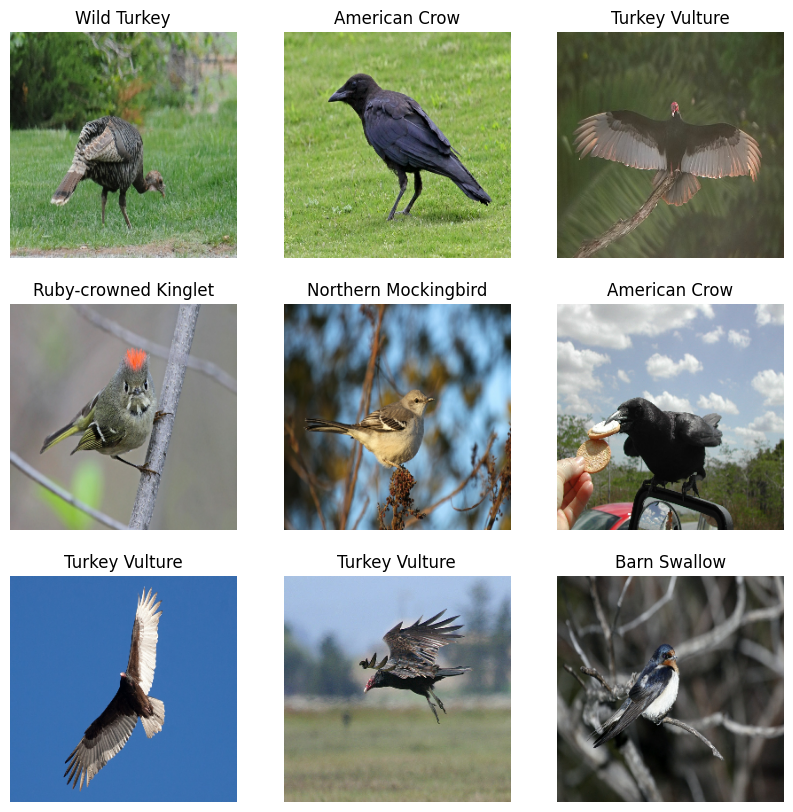

In [5]:
# load the training and validation dataset using an 80/20 split

from tensorflow import keras
import matplotlib.pyplot as plt

img_width = 256
img_height = 256

train_ds = keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "training",
    seed = 123,
    image_size = (img_width, img_height),
)

val_ds = keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "validation",
    seed = 123,
    image_size = (img_width, img_height),
)

class_names = train_ds.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")